In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from plotly  import graph_objects as go
from plotly.subplots import make_subplots

import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
from geneticalgorithm import geneticalgorithm as ga
from control import *

# Programação Linear (PL)

Exemplo 1 - PL:
$$
    Max(Z = 3x_{1} + 5x_{2})
$$
Sujeito a:

$$
\begin{cases}
x_{1} \leq 4 \\
2x_{2} \leq 12 \\
3x_{1} + 2x_{2} \leq 18 \\
x_{1} + x_{2} \geq 0 \\
\end{cases}
$$

In [97]:
# Criando Modelo
modelPL = pyo.ConcreteModel()

# Variáveis
modelPL.x1 = pyo.Var(bounds=(0,None))
x1 = modelPL.x1

modelPL.x2 = pyo.Var(bounds=(0,None))
x2 = modelPL.x2

# Restrições
modelPL.C1 = pyo.Constraint(expr=x1<=4)
modelPL.C2 = pyo.Constraint(expr=2*x2<=12)
modelPL.C3 = pyo.Constraint(expr=3*x1+2*x2<=18)

# Função Objetivo
modelPL.FOB = pyo.Objective(expr=3*x1 + 5*x2,
                            sense=maximize)

# Solver GLPK - OpenSource para PL
SolverFactory('glpk').solve(modelPL)

# Verificação da Execução
modelPL.pprint()

x1_value = pyo.value(x1)
x2_value = pyo.value(x2)

print('-'*50)
print(f'x1 = {x1_value}')
print(f'x2 = {x2_value}')
print(f'FOB = {pyo.value(modelPL.FOB)}')


2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   2.0 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   6.0 :  None : False : False :  Reals

1 Objective Declarations
    FOB : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 3*x1 + 5*x2

3 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :   x1 :   4.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf : 2*x2 :  12.0 :   True
    C3 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 3*x1 + 2*x2 :  18.0 :   True

6 Declarations: x1 x2 C1 C2 C3 FOB
----------------------------------------------

# Programação Inteira (PI)

Exemplo 2 - PI:
\begin{equation*}
    Max(Z = 20x_{1} + 10x_{2})
\end{equation*}
Sujeito a:

$$
\begin{cases}
x_{1} + 0.45x_{2} \leq 5 \\
x_{1} + 1.70x_{2} \leq 12 \\
x_{1} , x_{2} \geq 0 \\
\end{cases}
$$

Sendo x1 e x2 o número de caminhões utilizados 

In [98]:
# Criando Modelo
modelPL = pyo.ConcreteModel()

# Variáveis
modelPL.x1 = pyo.Var(bounds=(0,None))
x1 = modelPL.x1

modelPL.x2 = pyo.Var(bounds=(0,None))
x2 = modelPL.x2

# Restrições
modelPL.C1 = pyo.Constraint(expr= x1 + 0.45*x2 <=5)
modelPL.C2 = pyo.Constraint(expr= x1 + 1.70*x2 <=12)


# Função Objetivo
modelPL.FOB = pyo.Objective(expr=20*x1 + 10*x2,
                            sense=maximize)

# Solver GLPK - OpenSource para PL
SolverFactory('glpk').solve(modelPL)

# Verificação da Execução
modelPL.pprint()

x1_value = pyo.value(x1)
x2_value = pyo.value(x2)

print('-'*50)
print(f'x1 = {x1_value}')
print(f'x2 = {x2_value}')
print(f'FOB = {pyo.value(modelPL.FOB)}')

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  2.48 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   5.6 :  None : False : False :  Reals

1 Objective Declarations
    FOB : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 20*x1 + 10*x2

2 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None :  -Inf : x1 + 0.45*x2 :   5.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : x1 + 1.7*x2 :  12.0 :   True

5 Declarations: x1 x2 C1 C2 FOB
--------------------------------------------------
x1 = 2.48
x2 = 5.6
FOB = 105.6


In [99]:
# Criando Modelo ARREDONDADO
modelARREDONDADO = pyo.ConcreteModel()

# Variáveis
modelARREDONDADO.x1 = pyo.Var(within=Integers, bounds=(2,3))
x1 = modelARREDONDADO.x1

modelARREDONDADO.x2 = pyo.Var(within=Integers, bounds=(5,6))
x2 = modelARREDONDADO.x2

# Restrições
modelARREDONDADO.C1 = pyo.Constraint(expr= x1 + 0.45*x2 <=5)
modelARREDONDADO.C2 = pyo.Constraint(expr= x1 + 1.70*x2 <=12)

# Função Objetivo
modelARREDONDADO.FOB = pyo.Objective(expr=20*x1 + 10*x2,
                            sense=maximize)

# Solver Couenne - OpenSource para MINLP
SolverFactory('couenne', executable='../../../scripts/couenne/couenne').solve(modelARREDONDADO)

# Verificação da Execução
modelARREDONDADO.pprint()

x1_value = pyo.value(x1)
x2_value = pyo.value(x2)

print('-'*50)
print(f'x1 = {x1_value}')
print(f'x2 = {x2_value}')
print(f'FOB = {pyo.value(modelARREDONDADO.FOB)}')

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     2 :   2.0 :     3 : False : False : Integers
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     5 :   5.0 :     6 : False : False : Integers

1 Objective Declarations
    FOB : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 20*x1 + 10*x2

2 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None :  -Inf : x1 + 0.45*x2 :   5.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : x1 + 1.7*x2 :  12.0 :   True

5 Declarations: x1 x2 C1 C2 FOB
--------------------------------------------------
x1 = 2.0
x2 = 5.0
FOB = 90.0


In [100]:
# Criando Modelo
modelPI = pyo.ConcreteModel()

# Variáveis
modelPI.x1 = pyo.Var(within=Integers, bounds=(0,None))
x1 = modelPI.x1

modelPI.x2 = pyo.Var(within=Integers, bounds=(0,None))
x2 = modelPI.x2

# Restrições
modelPI.C1 = pyo.Constraint(expr= x1 + 0.45*x2 <=5)
modelPI.C2 = pyo.Constraint(expr= x1 + 1.70*x2 <=12)

# Função Objetivo
modelPI.FOB = pyo.Objective(expr=20*x1 + 10*x2,
                            sense=maximize)

# Solver Couenne - OpenSource para MINLP
SolverFactory('couenne', executable='../../../scripts/couenne/couenne').solve(modelPI)

# Verificação da Execução
modelPI.pprint()

x1_value = pyo.value(x1)
x2_value = pyo.value(x2)

print('-'*50)
print(f'x1 = {x1_value}')
print(f'x2 = {x2_value}')
print(f'FOB = {pyo.value(modelPI.FOB)}')

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   3.0 :  None : False : False : Integers
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   4.0 :  None : False : False : Integers

1 Objective Declarations
    FOB : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 20*x1 + 10*x2

2 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body         : Upper : Active
        None :  -Inf : x1 + 0.45*x2 :   5.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : x1 + 1.7*x2 :  12.0 :   True

5 Declarations: x1 x2 C1 C2 FOB
--------------------------------------------------
x1 = 3.0
x2 = 4.0
FOB = 100.0


# Programação Não Linear (PNL)

## Imagem

\begin{equation*}
Z = x^{2} + y^{2} + 25(sen^{2}x + sen^{2}y)
\end{equation*}

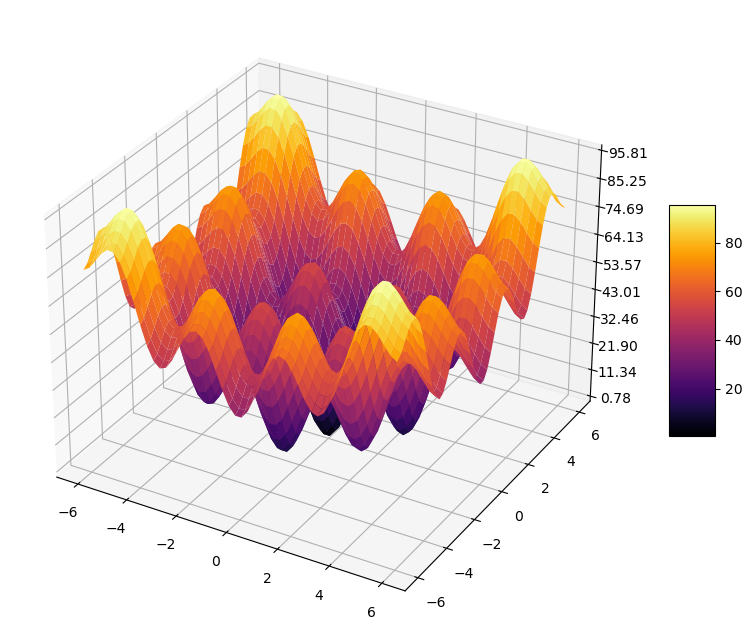

In [101]:
import math as m
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
xs, ys = np.meshgrid(x, y, sparse=True)
zs = (xs**2 + ys**2 + 25*(np.sin(xs)**2 + np.sin(ys)**2))

fig, ax = plt.subplots(figsize=(10,30),subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(xs, ys, zs, cmap=cm.inferno,
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.1, aspect=5)
plt.show()

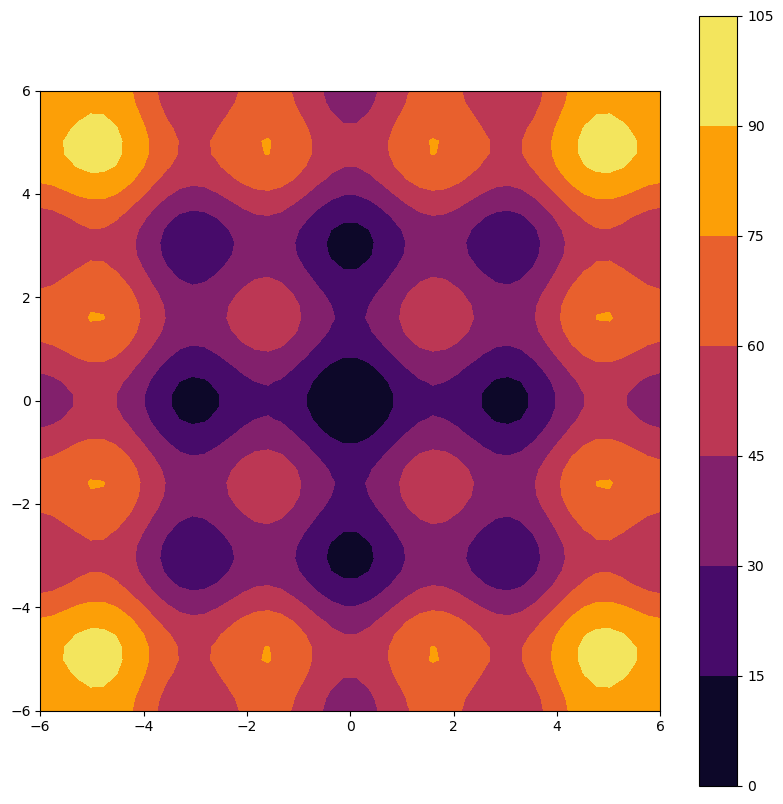

In [102]:
plt.figure(figsize=(10,10))
h = plt.contourf(x, y, zs)
plt.inferno()
plt.axis('scaled')
plt.colorbar()
plt.show()

## Exemplo PNL

\begin{equation*}
Max: Z = -x^{2} - y^{2} + xy + 6x + 2y
\end{equation*}

$$
\begin{cases}
2x + 2y = 12 \\
x,y \geq 0
\end{cases}
$$

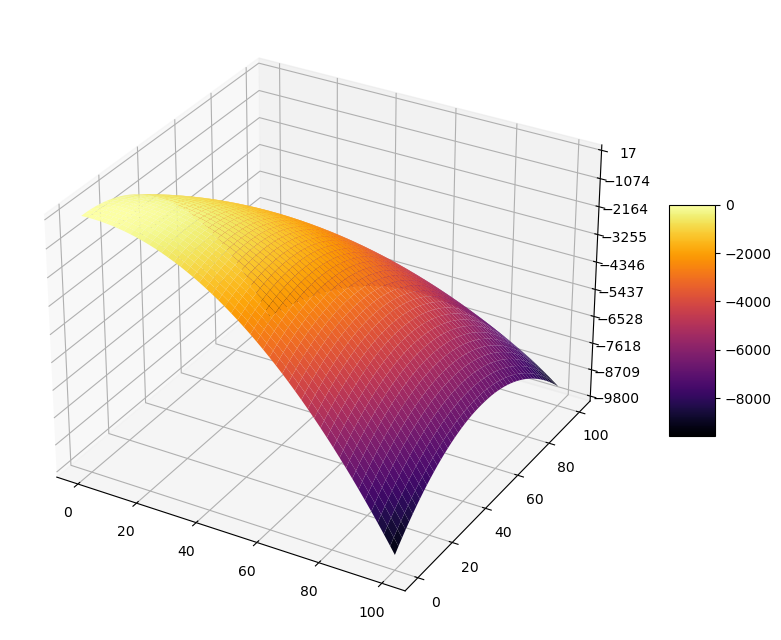

In [103]:
import math as m
x = np.linspace(0, 100, 200)
y = np.linspace(0, 100, 200)
xs, ys = np.meshgrid(x, y, sparse=True)
zs = (-xs**2 - ys**2 + xs*ys + 6*xs + 2*ys) 

fig, ax = plt.subplots(figsize=(10,30),subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(xs, ys, zs, cmap=cm.inferno,
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.1, aspect=5)
plt.show()

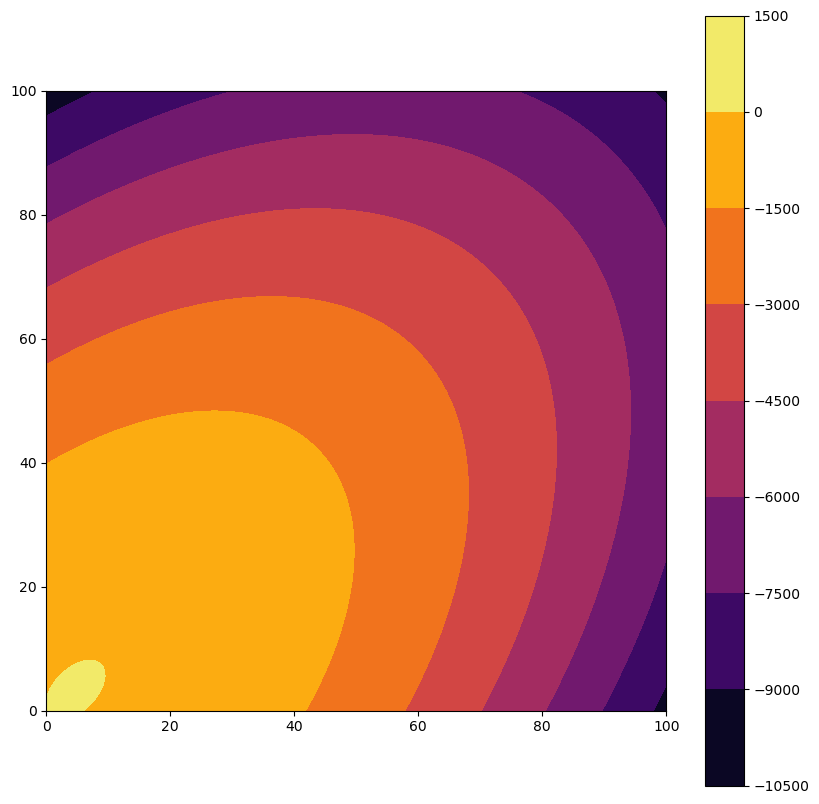

In [104]:
plt.figure(figsize=(10,10))
h = plt.contourf(x, y, zs)
plt.inferno()
plt.axis('scaled')
plt.colorbar()
plt.show()

In [105]:
# Criando Modelo
modelPNL = pyo.ConcreteModel()

# Variáveis
modelPNL.X = pyo.Var(bounds=(0,None))
X = modelPNL.X

modelPNL.Y = pyo.Var(bounds=(0,None))
Y = modelPNL.Y

# Restrições
modelPNL.C1 = pyo.Constraint(expr=2*X + 2*Y == 12)

# Função Objetivo
modelPNL.FOB = pyo.Objective(expr=-X**2 -Y**2 +X*Y + 6*X + 2*Y,
                            sense=maximize)

# Solver couenne - OpenSource para MINL
SolverFactory('couenne', executable='../../../scripts/couenne/couenne').solve(modelPNL)

# Verificação da Execução
modelPNL.pprint()

X_value = pyo.value(X)
Y_value = pyo.value(Y)

print('-'*50)
print(f'x1 = {X_value}')
print(f'x2 = {Y_value}')
print(f'FOB = {pyo.value(modelPNL.FOB)}')

2 Var Declarations
    X : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 3.6666666666661474 :  None : False : False :  Reals
    Y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 2.3333333333338526 :  None : False : False :  Reals

1 Objective Declarations
    FOB : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : - X**2 - Y**2 + X*Y + 6*X + 2*Y

1 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  12.0 : 2*X + 2*Y :  12.0 :   True

4 Declarations: X Y C1 FOB
--------------------------------------------------
x1 = 3.6666666666661474
x2 = 2.3333333333338526
FOB = 16.333333333333336


# Algoritmo Genético

<font size="5">Função Transferência é a representação matemática da relação entre a entrada e a saída de um sistema físico. 

<font size="5">Dado um modelo para a malha de arfagem de um avião, projete um controlador e determine a
faixa de ganho K  que melhore a respota ao degrau unitário e que atenda as especificações de estabilidade

* Margem de Ganho maior possível
* Margem de Fase < 40 db
* Erro Estático < 10\%

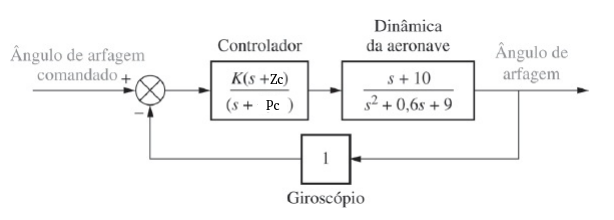


https://upload.wikimedia.org/wikipedia/commons/e/ec/Aileron_pitch.gif

In [106]:
# tf([num,den])

# [s^n, s^2, s^1, s^0]


dinamica_aeronave = tf([1,10],
                       [1,0.6,9])
dinamica_aeronave

TransferFunction(array([ 1, 10]), array([1. , 0.6, 9. ]))

<font size="5"> As especificações de projeto de sistemas de controle normalmente incluem vários índices de resposta temporal para
um sinal de entrada determinado, além de uma precisão especificada para a resposta estacionária. Os sinais de referência mais utilizados são o degrau, a rampa, a parábola (menos comum), o impulso e a senóide

\begin{equation*}
Y(t) = u(t)*ft(t)
\end{equation*}

In [107]:
t = np.linspace(0,10,1000)


ftmf_semCompensacao = feedback(dinamica_aeronave, 1)
t, respostaDegrau_semCompensacao = step_response(ftmf_semCompensacao, t)
t, degrauUnitario = step_response(tf([1], [1]), t)

atraso = np.zeros(50)
t = np.linspace(0,10,1050)

respostaDegrau_semCompensacao = np.concatenate((atraso,respostaDegrau_semCompensacao),axis=None)
degrauUnitario = np.concatenate((atraso,degrauUnitario),axis=None)
degrau = go.Figure(go.Scatter(go.Scatter(y=respostaDegrau_semCompensacao, x=t, name='Sistema Sem o Controlador')))
degrau.add_trace(go.Scatter(y=degrauUnitario, x=t, name='Degrau Unitário'))

degrau.update_layout(
    title="Resposta ao Degrau dos Sistemas",
    xaxis_title="Tempo",
    yaxis_title="Amplitude"
)
degrau.show()



<font size="5">

Cascata com um Compensador: 

\begin{equation*}
ft(s) = K.\dfrac{(s+zc)}{(s+pc)} . \dfrac{(s+10)}{(s^{2}+0.6s+9)}
\end{equation*}

<font size="5">
Determinar K, Zc, Pc para:

* Margem de Ganho maior possível
* Margem de Fase < 40 db
* Erro Estático < 10\%

In [108]:
def funcao_aptidao(p):
    
    zc = p[0]
    pc = p[1]
    K = p[2]
    
    controlador = tf([1,zc],
                     [1,pc])

    fator_de_primeira_ordem = tf([1,10],
                                    1)
    fator_de_segunda_ordem = tf(1,
                               [1,0.6,9])

    FTMA = K*controlador*fator_de_primeira_ordem*fator_de_segunda_ordem
    
    # HIBRIDISMO
    
    # margin() é um método da ferramenta de controle que calcula a margem de fase e margem de ganho
    gm, pm, wcg, wcp = margin(FTMA)

    # minreal() e dcgain() são método da ferramenta de controle que calcula o erro estático
    c = minreal(tf([1, 0], [1]) * FTMA, verbose=False)
    Kv = dcgain(c)

    # Cálculo do Erro entre o resultado e as especificações solicitadas
    
    emf = abs(40 - pm) # MARGEM DE FASE: Especificado - Calculado
    ee = abs(0.1 - Kv) # ERRO ESTÁTICO: Especificado - Calculado
    
    emg = abs(1/gm) # MARGEM DE GANHO: variavel livre, o erro é o inverso pq quanto maior a margem de ganho melhor

    eq = emg + emf + ee # FUNÇÃO APTIDÃO: Minimização do Somatório dos Erros
    return eq

__________________________________________________ 0.1% GA is running...

/home/lucasedbraga/anaconda3/envs/otm_venv/lib/python3.10/site-packages/geneticalgorithm/geneticalgorithm.py:353: RuntimeWarning:

invalid value encountered in subtract



 The best solution found:                                                                           
 [9.8581121  6.32245562 6.85050591]

 Objective function:
 0.10010780531528099


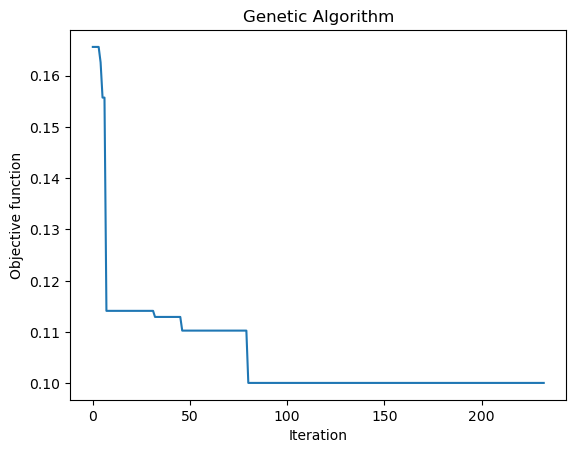

In [109]:
varbound = np.array([[0,10], [0, 10], [0, 10]]) # Limitando o Espaço de Busca

algorithm_param = {'max_num_iteration': 1000,
                   'population_size':100,
                   'mutation_probability':0.4,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':150,
                   'param convergence_curve':False}

model = ga(function=funcao_aptidao,
           dimension=3,
           variable_type='real',
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

model.run() # Execução do Algoritmo Genético

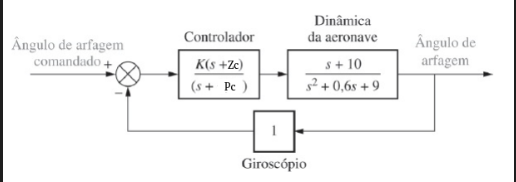

In [110]:
zc = float(model.output_dict['variable'][0])
pc = float(model.output_dict['variable'][1])
K = float(model.output_dict['variable'][2])

controlador = tf([1,zc],
                [1,pc])

fator_de_primeira_ordem = tf([1,10],
                                1)
fator_de_segunda_ordem = tf(1,
                            [1,0.6,9])


FTMA = K*controlador*fator_de_primeira_ordem*fator_de_segunda_ordem

gm, pm, wcg, wcp = margin(FTMA)
c = minreal(tf([1, 0], [1]) * FTMA, verbose=False)
Kv = dcgain(c)

requisitos = [0,0,0]

while True:
    # Verificação se a solução Encontrada atende aos requisitos especificados
    if 20*np.log10(gm) >= 9.9:
        requisitos[0] = 1
    if pm >= 39.9:
        requisitos[1] = 1
    if Kv <= 0.1:
        requisitos[2] = 1

    if requisitos == [1,1,1]:
        print('-----------------------------------------')
        print('Todos os Requisitos foram atendidos!')
        print(f'Zero do Controlador = {zc}')
        print(f'Polo do Controlador = {pc}')
        print(f'Ganho K = {K}')
        print('-----------------------------------------')
        print(f'Margem de Ganho = {20 * np.log10(gm)}')
        print(f'Margem de Fase = {pm}')
        print(f'Erro Estático = {Kv}')
        print('-----------------------------------------')
        break
    
    else:
        print('\n ########################################')
        print('NÃO ATENDE TODOS OS REQUISTOS !')
        print(f'Margem de Ganho = {20 * np.log10(gm)}')
        print(f'Margem de Fase = {pm}')
        print(f'Erro Estático = {Kv}')
        print('########################################')
        
        model.run()

-----------------------------------------
Todos os Requisitos foram atendidos!
Zero do Controlador = 9.858112102774315
Polo do Controlador = 6.3224556232610745
Ganho K = 6.850505905482129
-----------------------------------------
Margem de Ganho = inf
Margem de Fase = 40.00010780531528
Erro Estático = 0.0
-----------------------------------------


In [111]:
ftmfCompensado = feedback(FTMA, 1)
ftmfCompensado

TransferFunction(array([  6.85050591, 136.03811423, 675.33055177]), array([  1.        ,  13.77296153, 148.83158761, 732.23265238]))

In [112]:
ftmf_semCompensacao = feedback(dinamica_aeronave, 1)
t, respostaDegrau_semCompensacao = step_response(ftmf_semCompensacao, t)

ftmfCompensado = feedback(FTMA, 1)
t, respostaDegrauCompensado = step_response(ftmfCompensado, t)

t, degrauUnitario = step_response(tf([1], [1]), t)

atraso = np.zeros(50)
t = np.linspace(0,10,1050)
respostaDegrau_semCompensacao = np.concatenate((atraso,respostaDegrau_semCompensacao),axis=None)
respostaDegrauCompensado = np.concatenate((atraso,respostaDegrauCompensado),axis=None)
degrauUnitario = np.concatenate((atraso,degrauUnitario),axis=None)


degrau = go.Figure(go.Scatter(go.Scatter(y=respostaDegrau_semCompensacao, x=t, name='Sistema sem o Controlador')))
degrau.add_trace(go.Scatter(y=respostaDegrauCompensado, x=t, name='Sistema com o Controlador Projetado'))
degrau.add_trace(go.Scatter(y=degrauUnitario, x=t, name='Degrau Unitário'))
degrau.update_layout(
    title="Resposta ao Degrau dos Sistemas",
    xaxis_title="Tempo",
    yaxis_title="Amplitude"
)
degrau.show()